In [73]:
import numpy as np
import tensorflow as tf

weights = np.loadtxt("weights_tract.txt")
length_matrix = np.loadtxt("lengths_tract.txt")

In [74]:
lengths = tf.constant(length_matrix, dtype = "float")

In [183]:
np.max(length_matrix)

length_mod = np.reshape([x if x != 0 else 250 for x in length_matrix.flatten() ], (66,66))



[[  6.74445948  13.50471691   6.67447918 ... 250.          30.15751953
   16.80281639]
 [ 13.50471691   8.03799956  55.18030341 ...  41.01924438  96.79040578
   17.17203385]
 [  6.67447918  55.18030341   6.17893685 ... 250.         250.
  250.        ]
 ...
 [250.          41.01924438 250.         ...   6.48150824 250.
    9.40595596]
 [ 30.15751953  96.79040578 250.         ... 250.          15.6666076
   44.16245728]
 [ 16.80281639  17.17203385 250.         ...   9.40595596  44.16245728
    6.83171839]]


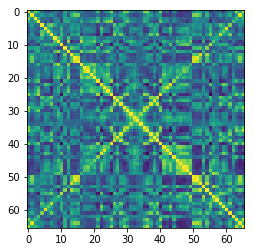

In [154]:
thirty_rest = np.loadtxt("30rest.txt", float, delimiter = ",")
thirty_rest = np.reshape(thirty_rest, (66,30,1200))
thirty_rest = np.swapaxes(thirty_rest, 0,1)
plt.imshow(np.corrcoef(thirty_rest[0,:,:]))

In [78]:
from random import randint 
def sample(all_scans):
    number = randint(0,29)
    return all_scans[number], number

0
-0.024403344607901032


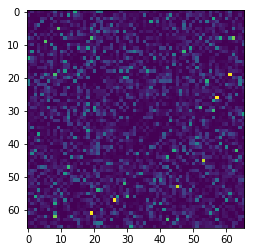

1000
0.013760813140992789


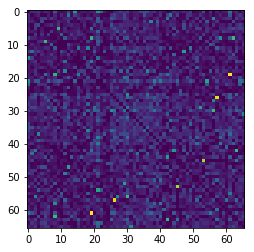

2000
0.050292799915183435


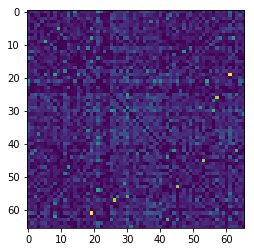

3000
0.08853915292206449


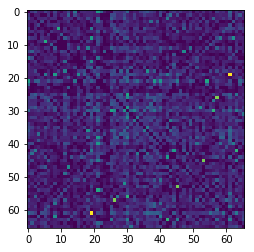

4000
0.1427433073409625


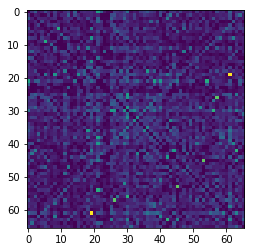

5000
0.2261532802730689


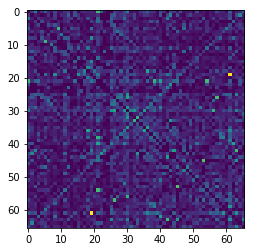

6000
0.35674457867147497


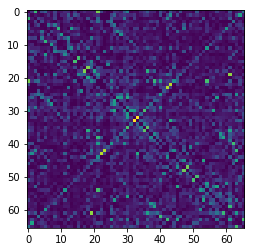

7000
0.4695084363075658


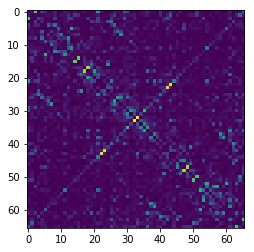

8000
0.5001219664993278


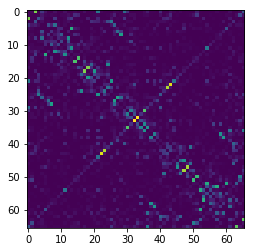

9000
0.4992517615101978


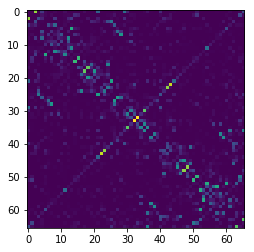

[[0.0000000e+00 1.5915540e-04 5.2770269e-01 ... 1.7837397e-03
  9.8245069e-03 1.4069848e-01]
 [1.5915540e-04 0.0000000e+00 7.3669071e-11 ... 3.2830276e-04
  1.3839220e-01 1.4767707e-02]
 [5.2770269e-01 7.3669071e-11 0.0000000e+00 ... 4.2199609e-03
  1.4242136e-06 1.1619087e-04]
 ...
 [1.7837397e-03 3.2830276e-04 4.2199609e-03 ... 0.0000000e+00
  1.5692023e-04 4.8472756e-01]
 [9.8245069e-03 1.3839220e-01 1.4242136e-06 ... 1.5692023e-04
  0.0000000e+00 1.9717539e-02]
 [1.4069848e-01 1.4767707e-02 1.1619087e-04 ... 4.8472756e-01
  1.9717539e-02 0.0000000e+00]]


In [185]:
import matplotlib.pyplot as plt
rest = tf.placeholder(tf.float32, shape = (66, 1199))
dr = tf.placeholder(tf.float32, shape = (66, 1199))
dt = tf.constant(.72, dtype = tf.dtypes.float32)
id = tf.constant(np.identity(66), dtype = tf.dtypes.float32)
length_tru = tf.constant(length_mod, dtype = tf.dtypes.float32 )

alpha = tf.constant(0.001)


weight_matrix0 = tf.Variable(np.random.randn(66,66), dtype = tf.dtypes.float32)
weight_matrix1 = tf.add(weight_matrix0,tf.transpose(weight_matrix0))
diagonal = tf.diag(tf.diag_part(weight_matrix1))
weight_matrix2 = tf.subtract(weight_matrix1, diagonal)
weight_matrix = tf.square(weight_matrix2)


weight_minus_id = tf.subtract(weight_matrix, id)
predicted = tf.linalg.matmul(weight_minus_id, rest)
predicted = tf.math.scalar_mul(dt, predicted)

loss = tf.losses.mean_squared_error(dr, predicted) + tf.math.multiply(tf.norm(tf.multiply(weight_matrix, length_tru)), alpha)
optimizer = tf.train.AdamOptimizer(learning_rate = .001).minimize(loss)
#.004 too slow
#.01 faster but only gets to 128 with 10000 iterations
#.05 goes down to 600 then bounces back up
#.1 bounces around too much
#.025 bounces bck up too
#.0009 gos down to 61
#.00065 goes down to 70
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10000):
    random_sample, number = sample(thirty_rest)
    
    current_frame = np.delete(random_sample, 1199, 1)
    next_step = np.delete(random_sample, 0, 1)
    change = np.subtract(current_frame, next_step)
    [opt, my_weights, session_loss] = sess.run(fetches = [optimizer, weight_matrix, loss], feed_dict = {rest: current_frame, dr: change})
    if i%1000 == 0:
        print(i)
        print(np.corrcoef(weights.flatten(), my_weights.flatten())[0,1])
        plt.imshow(my_weights)
        plt.show()
print(my_weights)


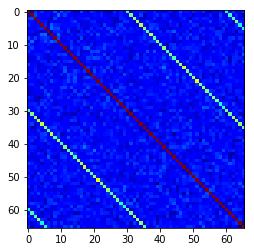

In [120]:
plt.imshow(np.corrcoef(my_weights), cmap = "jet")    

In [91]:
def test_sample():
    for i in range(1):
        result, num = sample(thirty_rest)
        print(np.asarray(thirty_rest).shape)
        for j in range(1):
            print(thirty_rest[num])
            print(result == thirty_rest[num])
        return result

In [92]:
x = test_sample()

(30, 66, 1200)
[[-0.015761   0.5408     0.98979   ...  0.25627    0.13213   -0.029749 ]
 [ 0.027883  -0.088101  -0.17672   ... -0.4822    -0.22617    0.037316 ]
 [ 0.011022  -0.56958   -1.0429    ... -1.1805    -0.59253    0.027418 ]
 ...
 [ 0.03603   -0.16163   -0.39762   ... -1.1449    -0.53398    0.071187 ]
 [ 0.0062698  0.38371    0.75302   ... -0.67758   -0.37915   -0.0037132]
 [ 0.0081339 -0.57355   -1.084     ...  0.38259    0.21871    0.024591 ]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [147]:
x

array([[-0.015761 ,  0.5408   ,  0.98979  , ...,  0.25627  ,  0.13213  ,
        -0.029749 ],
       [ 0.027883 , -0.088101 , -0.17672  , ..., -0.4822   , -0.22617  ,
         0.037316 ],
       [ 0.011022 , -0.56958  , -1.0429   , ..., -1.1805   , -0.59253  ,
         0.027418 ],
       ...,
       [ 0.03603  , -0.16163  , -0.39762  , ..., -1.1449   , -0.53398  ,
         0.071187 ],
       [ 0.0062698,  0.38371  ,  0.75302  , ..., -0.67758  , -0.37915  ,
        -0.0037132],
       [ 0.0081339, -0.57355  , -1.084    , ...,  0.38259  ,  0.21871  ,
         0.024591 ]])

In [94]:
np.linalg.norm(length_matrix)

7515.160209655762